In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\aryan\Downloads\archive\netflix_titles.csv")

In [ ]:

df_clean = df.copy()


df_clean['director'].fillna("Unknown", inplace=True)
df_clean['cast'].fillna("Unknown", inplace=True)
df_clean['country'].fillna("Unknown", inplace=True)
df['date_parsed'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), format="%B %d, %Y", errors='coerce')


df['year_added'] = df['date_parsed'].dt.year
df['month_added'] = df['date_parsed'].dt.month
df_clean['rating'].fillna("Unknown", inplace=True)
df_clean['duration'].fillna("Unknown", inplace=True)


print("Duplicates before:", df_clean.duplicated().sum())
df_clean.drop_duplicates(inplace=True)
print("Duplicates after:", df_clean.duplicated().sum())


text_cols = ['title', 'director', 'cast', 'country', 'listed_in', 'description']
for col in text_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()


df['date_parsed'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), format="%B %d, %Y", errors='coerce')


df['year_added'] = df['date_parsed'].dt.year
df['month_added'] = df['date_parsed'].dt.month


df_clean['duration_int'] = df_clean['duration'].str.extract('(\d+)')
df_clean['duration_type'] = df_clean['duration'].str.extract('([a-zA-Z]+)')
df_clean['duration_int'] = pd.to_numeric(df_clean['duration_int'], errors='coerce')


df_clean['genre_list'] = df_clean['listed_in'].apply(lambda x: [g.strip() for g in x.split(",")] if x != "Unknown" else [])


print("\nCleaned Data Overview:")
print(df_clean.info())
print(df_clean.head())


Duplicates before: 0
Duplicates after: 0

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8797 non-null   object        
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8807 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  date_parsed    8797 non-null   datetime64[ns]
 13  year_added     8797 non-null   float64       
 14  month_a

In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_parsed,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2020.0,1.0


In [19]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [21]:

df['rating'] = df['rating'].apply(lambda x: x if isinstance(x, str) and 'min' not in x else None)

df = df.dropna(subset=['rating'])
df['rating'].unique()


C:\Users\aryan\AppData\Local\Temp\ipykernel_17664\90222976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].apply(lambda x: x if isinstance(x, str) and 'min' not in x else None)


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
from collections import Counter
!pip install WordCloud
from wordcloud import WordCloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 3.1 MB/s eta 0:00:00


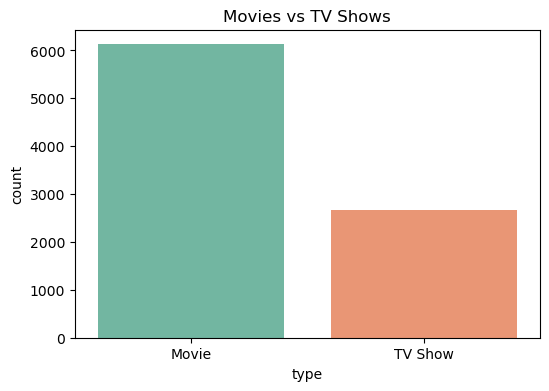

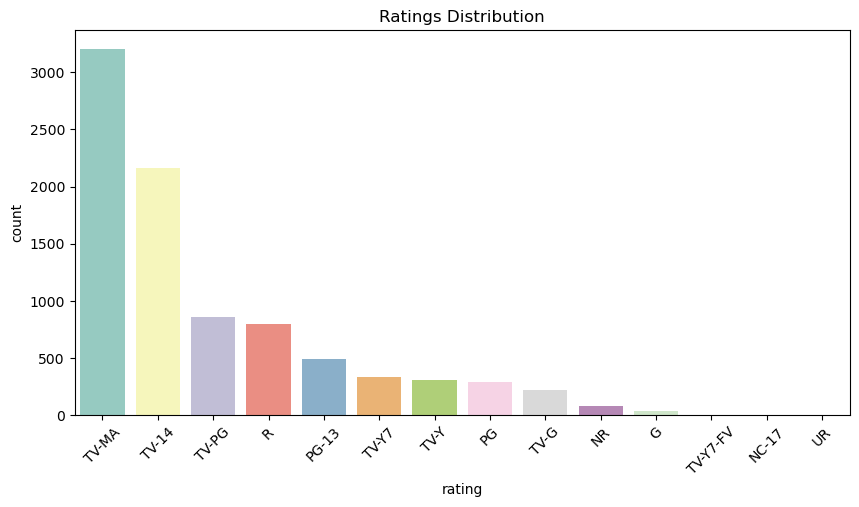

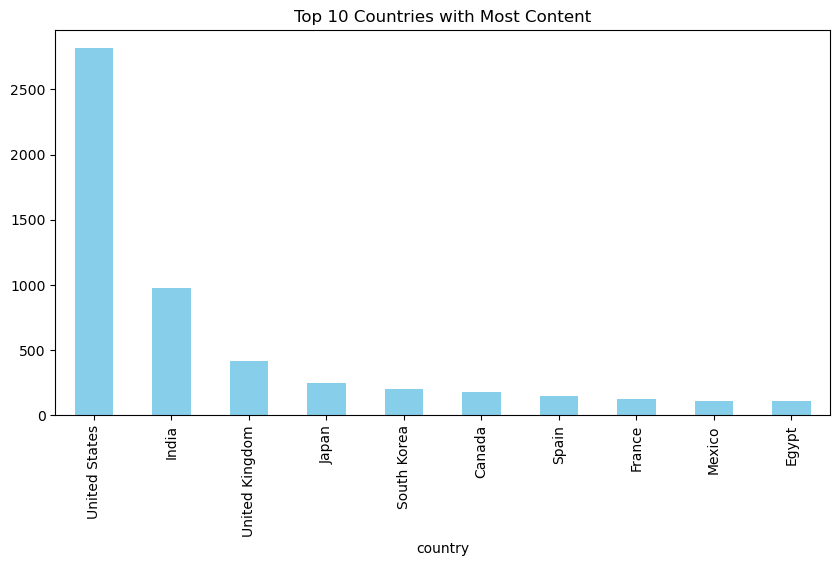

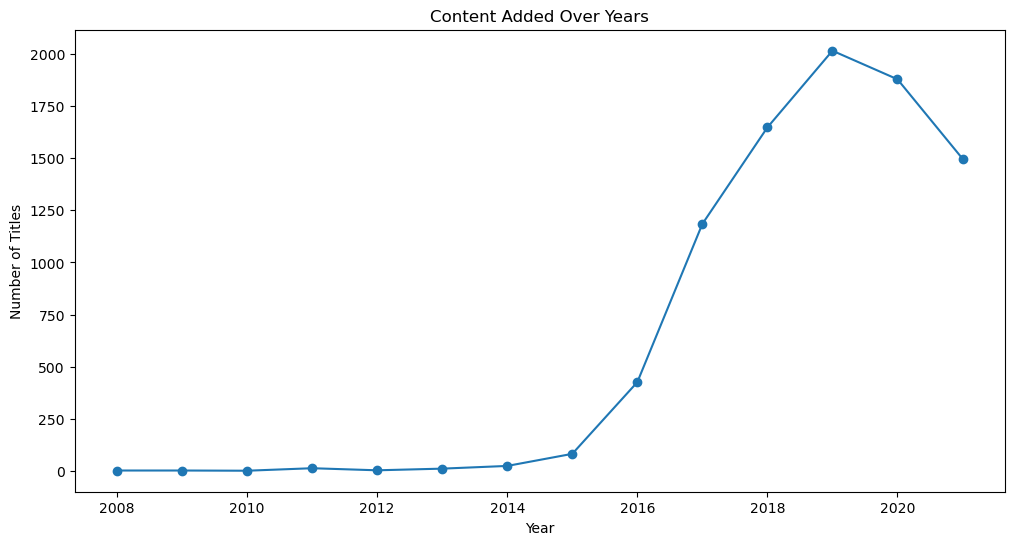

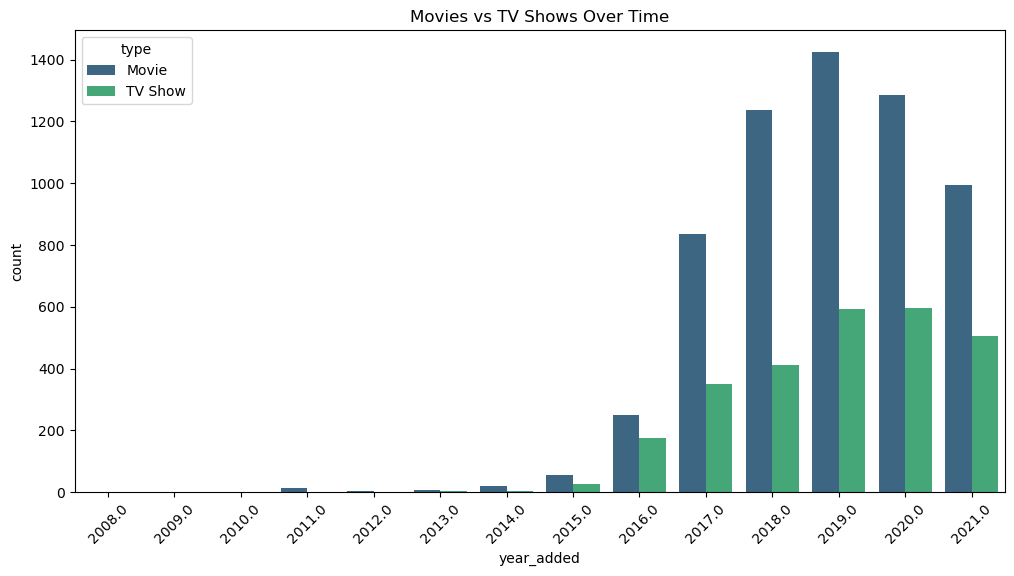

c:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


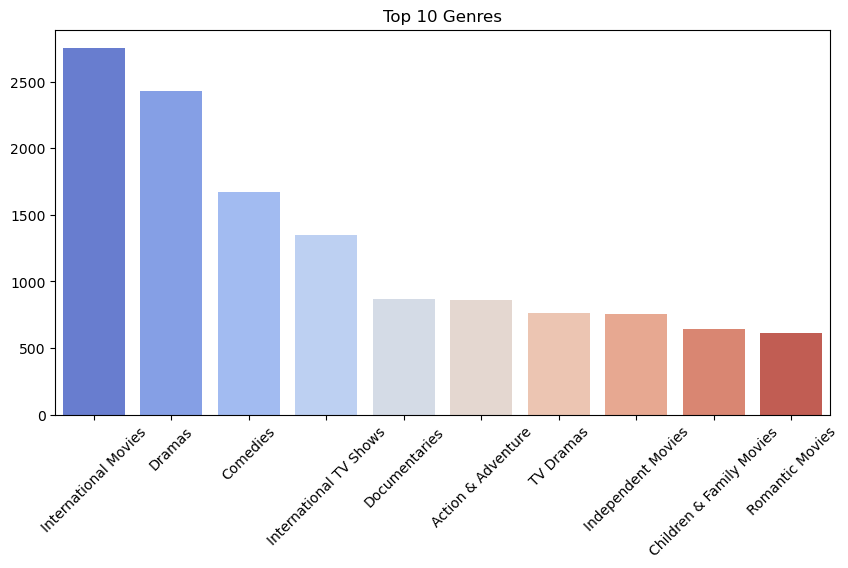

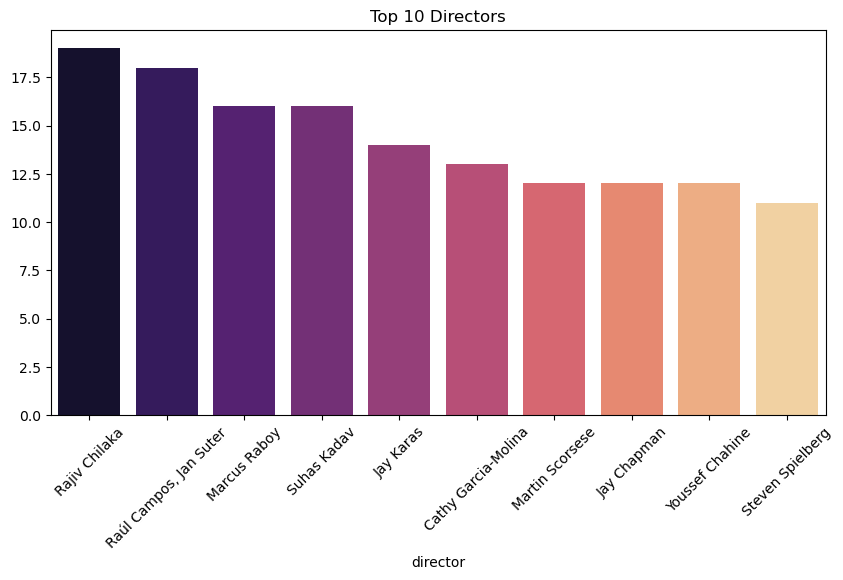

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Movies vs TV Shows")
plt.show()


plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rating", order=df['rating'].value_counts().index, palette="Set3")
plt.title("Ratings Distribution")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color="skyblue")
plt.title("Top 10 Countries with Most Content")
plt.show()


plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


plt.figure(figsize=(12,6))
sns.countplot(data=df, x="year_added", hue="type", palette="viridis")
plt.title("Movies vs TV Shows Over Time")
plt.xticks(rotation=45)
plt.show()


genre_list = df['listed_in'].dropna().apply(lambda x: x.split(", "))
genres = [g for sublist in genre_list for g in sublist]
top_genres = Counter(genres).most_common(10)

plt.figure(figsize=(10,5))
sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres], palette="coolwarm")
plt.title("Top 10 Genres")
plt.xticks(rotation=45)
plt.show()


top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="magma")
plt.title("Top 10 Directors")
plt.xticks(rotation=45)
plt.show()

